# Decision Tree Regression

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
x = dataset[['Salnty']].iloc[:1000,:].values
y = dataset[['T_degC']].iloc[:1000,:].values

## Taking care of missing data

In [3]:
from sklearn.impute import SimpleImputer
x_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = x_imputer.fit_transform(x)

In [4]:
y_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = y_imputer.fit_transform(y)

## Splitting the data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Training the model

In [6]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

## Testing the model

In [7]:
y_pred = regressor.predict(x_test).reshape(-1, 1)
print(np.concatenate((y_pred, y_test), 1))

[[ 5.03        7.76      ]
 [12.84714286 13.57      ]
 [ 5.95        7.91      ]
 [10.64       12.5       ]
 [ 6.10285714  3.51      ]
 [ 4.31        4.3       ]
 [ 4.33        4.72      ]
 [10.855       9.83      ]
 [ 4.225       4.53      ]
 [10.4        12.46      ]
 [ 4.32666667  4.5       ]
 [12.26       12.19      ]
 [ 4.11        5.09      ]
 [ 7.61        5.13      ]
 [ 4.38        4.65      ]
 [ 3.46        3.99      ]
 [ 3.43        4.42      ]
 [ 3.65        3.88      ]
 [ 8.01        8.76      ]
 [ 8.25        7.58      ]
 [10.77        9.75      ]
 [ 9.18        9.21      ]
 [ 4.32666667  3.42      ]
 [11.45       11.5       ]
 [13.46       13.16      ]
 [ 4.8         4.19      ]
 [ 7.6         6.32      ]
 [ 9.79        9.02      ]
 [12.89875    13.6       ]
 [10.572      10.46      ]
 [ 4.225       3.41      ]
 [11.03333333 10.41      ]
 [12.65307692 13.94      ]
 [ 4.68        3.84      ]
 [10.26       11.3       ]
 [12.0875     13.13      ]
 [ 9.52666667  9.18      ]
 

## Visualizing the results

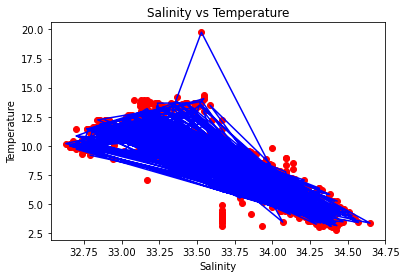

In [8]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salinity vs Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

## Evaluating the model

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7594778965474795